In [34]:
import pandas as pd

In [35]:
game = pd.read_csv('full base.csv', sep=';', encoding='latin-1')

In [36]:
game.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available
0,7905413.0,05.05.2023 23:57,05.05.2023 01:20,RU,True,Dolphins,more likely to pay,73.50,5,05.05.2023 01:16,...,Organic,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,True
1,7908913.0,05.05.2023 23:57,05.05.2023 05:05,RU,False,Non paying,wonât pay,0.00,0,NaN,...,Facebook Ads,2.0,apple,IPAD MINI 3,1.23.18,1.23.18,mobisharks,6.0000,0,True
2,7906219.0,05.05.2023 23:56,08.05.2023 00:47,RU,False,Non paying,more likely to pay,0.00,0,NaN,...,Organic,5.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,13.0000,3,True
3,7906161.0,05.05.2023 23:56,05.05.2023 00:18,RU,False,Non paying,more likely to pay,0.00,0,NaN,...,Organic,2.0,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0000,0,True
4,7908192.0,05.05.2023 23:55,06.05.2023 03:50,RU,False,Non paying,wonât pay,0.00,0,NaN,...,Organic,2.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,9.0000,1,True


In [37]:
game.shape

(8000, 21)

Заменим на нулевые нечисловые значения в столбце с суммами платежей:

In [38]:
game['Payments sum'] = game['Payments sum'].str.replace('íîßá.50', '0.00')
game['Payments sum'] = game['Payments sum'].str.replace('ôåâð.50', '0.00')
game['Payments sum'] = game['Payments sum'].str.replace('îêò.50', '0.00')
game['Payments sum'] = game['Payments sum'].str.replace('ìàðò.50', '0.00')
game['Payments sum'] = game['Payments sum'].str.replace('ñåíò.50', '0.00')
game['Payments sum'] = game['Payments sum'].str.replace('äåê.50', '0.00')
game['Payments sum'] = game['Payments sum'].str.replace('àïð.50', '0.00')
game['Payments sum'] = game['Payments sum'].astype(float)
game['Payments sum'].value_counts()

/var/folders/1h/vqv73dpj67d3jnhdbwywyynm0000gn/T/ipykernel_923/152513994.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  game['Payments sum'] = game['Payments sum'].str.replace('íîßá.50', '0.00')
/var/folders/1h/vqv73dpj67d3jnhdbwywyynm0000gn/T/ipykernel_923/152513994.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  game['Payments sum'] = game['Payments sum'].str.replace('ôåâð.50', '0.00')
/var/folders/1h/vqv73dpj67d3jnhdbwywyynm0000gn/T/ipykernel_923/152513994.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  game['Payments sum'] = game['Payments sum'].str.replace('îêò.50', '0.00')
/var/folders/1h/vqv73dpj67d3jnhdbwywyynm0000gn/T/ipykernel_923/152513994.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  game['Payments sum'] = game['Payments sum'].str.replace('ìàðò.50', '0.00')
/

0.0      7855
1.0         8
8.0         8
50.0        7
23.5        6
         ... 
103.5       1
86.5        1
84.5        1
85.5        1
165.0       1
Name: Payments sum, Length: 80, dtype: int64

In [39]:
#1. Переведем даты установки и последнего посещения в форматы datetime
game['Install date'] = pd.to_datetime(game['Install date'], format="%d.%m.%Y %H:%M")
game['Install date'] = game['Install date'].dt.date
game['Last seen'] = pd.to_datetime(game['Last seen'], format="%d.%m.%Y %H:%M")
game['Last seen'] = game['Last seen'].dt.date
game.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available
0,7905413.0,2023-05-05,2023-05-05,RU,True,Dolphins,more likely to pay,73.5,5,05.05.2023 01:16,...,Organic,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,True
1,7908913.0,2023-05-05,2023-05-05,RU,False,Non paying,wonât pay,0.0,0,NaN,...,Facebook Ads,2.0,apple,IPAD MINI 3,1.23.18,1.23.18,mobisharks,6.0000,0,True
2,7906219.0,2023-05-05,2023-05-08,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,Organic,5.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,13.0000,3,True
3,7906161.0,2023-05-05,2023-05-05,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,Organic,2.0,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0000,0,True
4,7908192.0,2023-05-05,2023-05-06,RU,False,Non paying,wonât pay,0.0,0,NaN,...,Organic,2.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,9.0000,1,True


In [40]:
game['Lifetime'] = (game['Last seen'] - game['Install date']).dt.days
game.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
0,7905413.0,2023-05-05,2023-05-05,RU,True,Dolphins,more likely to pay,73.5,5,05.05.2023 01:16,...,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,True,0
1,7908913.0,2023-05-05,2023-05-05,RU,False,Non paying,wonât pay,0.0,0,NaN,...,2.0,apple,IPAD MINI 3,1.23.18,1.23.18,mobisharks,6.0000,0,True,0
2,7906219.0,2023-05-05,2023-05-08,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,5.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,13.0000,3,True,3
3,7906161.0,2023-05-05,2023-05-05,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,2.0,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0000,0,True,0
4,7908192.0,2023-05-05,2023-05-06,RU,False,Non paying,wonât pay,0.0,0,NaN,...,2.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,9.0000,1,True,1


Сравним количество платящих и неплатящих клиентов в разрезе стран:

In [41]:
payers_country = game.groupby(['Country','Payer']).count()
payers_country.head(8)

Client ID  Install date  Last seen  Paying capacity  \
Country Payer                                                        
CN      False       1858          1895       1895             1895   
        True         103           105        105              105   
RU      False       1909          1954       1954             1954   
        True          44            46         46               46   
TR      False       1931          1962       1962             1962   
        True          38            38         38               38   
US      False       1854          1889       1889             1889   
        True         110           111        111              111   

               Predicted paying status  Payments sum  Payments count  \
Country Payer                                                          
CN      False                     1895          1895            1895   
        True                       105           105             105   
RU      False                     1954          1954            1954   
        True                        46            46              46   
TR      False                     1962          1962            1962   
        True                        38            38              38   
US      False                     1889          1889            1889   
        True                       111           111             111   

               First payment date  Last payment date  Channel  User level  \
Country Payer                                                               
CN      False                   0                  0     1895        1858   
        True                   68                105      105         103   
RU      False                   0                  0     1954        1909   
        True                   12                 46       46          44   
TR      False                   0                  0     1962        1931   
        True                   27                 38       38          38   
US      False                   0                  0     1889        1854   
        True                   76                111      111         110   

               Platfrom  Device  Current app version  First app version  \
Country Payer                                                             
CN      False      1895    1895                 1858               1895   
        True        105     105                  103                105   
RU      False      1954    1954                 1909               1954   
        True         46      46                   44                 46   
TR      False      1962    1962                 1931               1962   
        True         38      38                   38                 38   
US      False      1889    1889                 1854               1889   
        True        111     111                  110                111   

               Agency  Session count  Max days  Push available  Lifetime  
Country Payer                                                             
CN      False    1129           1886      1895            1895      1895  
        True       79            104       105             105       105  
RU      False    1212           1914      1954            1954      1954  
        True       30             44        46              46        46  
TR      False    1182           1954      1962            1962      1962  
        True       28             38        38              38        38  
US      False    1166           1863      1889            1889      1889  
        True       70            111       111             111       111

Мы можем увидеть, что при равном взятом количестве клиентов из разных стран, количество платящих клиентов в России и Турции намного меньше,чем количество платящих клиентов в США и Китае. Посмотрим в разрезе используемой платформы:

In [42]:
payers_platform = game.groupby(['Platfrom', 'Payer']).count()
payers_platform.head(8)

Client ID  Install date  Last seen  Country  Paying capacity  \
Platfrom Payer                                                                 
android  False       3737          3885       3885     3885             3885   
         True         110           115        115      115              115   
apple    False       3815          3815       3815     3815             3815   
         True         185           185        185      185              185   

                Predicted paying status  Payments sum  Payments count  \
Platfrom Payer                                                          
android  False                     3885          3885            3885   
         True                       115           115             115   
apple    False                     3815          3815            3815   
         True                       185           185             185   

                First payment date  Last payment date  Channel  User level  \
Platfrom Payer                                                               
android  False                   0                  0     3885        3737   
         True                   70                115      115         110   
apple    False                   0                  0     3815        3815   
         True                  113                185      185         185   

                Device  Current app version  First app version  Agency  \
Platfrom Payer                                                           
android  False    3885                 3737               3885     874   
         True      115                  110                115      22   
apple    False    3815                 3815               3815    3815   
         True      185                  185                185     185   

                Session count  Max days  Push available  Lifetime  
Platfrom Payer                                                     
android  False           3802      3885            3885      3885  
         True             112       115             115       115  
apple    False           3815      3815            3815      3815  
         True             185       185             185       185

Как и следовало ожидать, пользователи Андроида менее платящие, чем пользователи Эппл (более чем в 1,5 раза).

Рассмотрим только платящих клиентов в разрезе категорий по странам:

In [43]:
filter_ = game['Paying capacity'] != 'Non paying'

In [44]:
only_paying = game[filter_]
only_paying.groupby(['Country','Paying capacity']).count()

Client ID  Install date  Last seen  Payer  \
Country Paying capacity                                              
CN      Dolphins                40            40         40     40   
        Minnows                 63            65         65     65   
RU      Dolphins                 6             7          7      7   
        Minnows                 38            39         39     39   
TR      Dolphins                14            14         14     14   
        Minnows                 24            24         24     24   
US      Dolphins                39            39         39     39   
        Grand dolphins           1             1          1      1   
        Minnows                 70            71         71     71   

                         Predicted paying status  Payments sum  \
Country Paying capacity                                          
CN      Dolphins                              40            40   
        Minnows                               65            65   
RU      Dolphins                               7             7   
        Minnows                               39            39   
TR      Dolphins                              14            14   
        Minnows                               24            24   
US      Dolphins                              39            39   
        Grand dolphins                         1             1   
        Minnows                               71            71   

                         Payments count  First payment date  \
Country Paying capacity                                       
CN      Dolphins                     40                  40   
        Minnows                      65                  28   
RU      Dolphins                      7                   7   
        Minnows                      39                   5   
TR      Dolphins                     14                  14   
        Minnows                      24                  13   
US      Dolphins                     39                  39   
        Grand dolphins                1                   1   
        Minnows                      71                  36   

                         Last payment date  Channel  User level  Platfrom  \
Country Paying capacity                                                     
CN      Dolphins                        40       40          40        40   
        Minnows                         65       65          63        65   
RU      Dolphins                         7        7           6         7   
        Minnows                         39       39          38        39   
TR      Dolphins                        14       14          14        14   
        Minnows                         24       24          24        24   
US      Dolphins                        39       39          39        39   
        Grand dolphins                   1        1           1         1   
        Minnows                         71       71          70        71   

                         Device  Current app version  First app version  \
Country Paying capacity                                                   
CN      Dolphins             40                   40                 40   
        Minnows              65                   63                 65   
RU      Dolphins              7                    6                  7   
        Minnows              39                   38                 39   
TR      Dolphins             14                   14                 14   
        Minnows              24                   24                 24   
US      Dolphins             39                   39                 39   
        Grand dolphins        1                    1                  1   
        Minnows              71                   70                 71   

                         Agency  Session count  Max days  Push available  \
Country Paying capacity                                                    
CN     

По статистике, во всех странах пескарей больше, чем дельфинов. Самая яркая пропорция - в России, здесь очень мало дельфинов по сравнению с пескарями. Самая уравновешенная пропорция - в Китае. Здесь больше людей готовы платить много. В США имеется один гранд-дельфин. 

Посмотрим сколько денег по странам нам принесли клиенты:

In [45]:
only_paying.groupby(['Country', 'Platfrom'])['Payments sum'].sum()

Country  Platfrom
CN       android      628.5
         apple       2005.0
RU       android      227.5
         apple        206.5
TR       android      252.0
         apple        766.0
US       android     1374.5
         apple       1934.0
Name: Payments sum, dtype: float64

Итак, за последнюю неделю наибольшую выручку нам принесли клиенты из США. Китайские пользователи на 2м месте, причем эппловские клиенты из Китая принесли больше выручки, чем Американские эппловские клиенты.

Рассмотрим также средний платеж, который совершили клиенты за данный период в разрезе стран:

In [46]:
only_paying.groupby('Country').mean()

,Client ID,Payer,Payments sum,Payments count,User level,Push available,Lifetime
Country,,,,,,,
CN,7.307752e+06,1.0,25.080952,1.923810,6.514563,0.838095,4.514286
RU,7.069082e+06,1.0,9.434783,0.717391,7.818182,0.782609,5.456522
TR,7.365081e+06,1.0,26.789474,2.473684,5.973684,0.894737,4.210526
US,6.938629e+06,1.0,29.806306,2.315315,5.718182,0.819820,3.702703


Средняя сумма платежей по странам в Китае, Турции и США практически одинакова, в России она ниже почти в 3 раза.

Разберем поподробнее категорию дельфинов (хорошо платящих клиентов). Какими девайсами они пользуются, какой у них лайфтайм, на каком уровне они находятся сейчас, установлены ли у них пуш-уведомления:

In [47]:
filter_1 = game['Paying capacity'] == 'Dolphins'
filter_2 = game['Paying capacity'] == 'Grand dolphins'
big_clients = game[filter_1|filter_2]
big_clients.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
0,7905413.0,2023-05-05,2023-05-05,RU,True,Dolphins,more likely to pay,73.5,5,05.05.2023 01:16,...,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,True,0
191,7906195.0,2023-05-05,2023-05-05,RU,True,Dolphins,will pay,54.5,4,05.05.2023 19:34,...,3.0,apple,IPHONE 6,1.23.18,1.23.18,mobisharks,6.0000,1,False,0
782,7905585.0,2023-05-05,2023-05-12,RU,True,Dolphins,will pay,76.5,5,09.05.2023 01:46,...,10.0,apple,IPHONE 6S PLUS,1.23.19,1.23.18,mobisharks,30.0000,11,True,7
1001,7907080.0,2023-05-05,2023-05-06,CN,True,Dolphins,will pay,23.5,4,05.05.2023 00:27,...,3.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,4.0000,1,True,1
1026,7908403.0,2023-05-05,2023-05-09,CN,True,Dolphins,will pay,55.0,3,05.05.2023 03:15,...,5.0,apple,IPAD MINI 3,1.23.19,1.23.18,mobisharks,20.0000,4,True,4


In [48]:
big_clients.groupby('Device').count().sort_values(by = 'Client ID', ascending = False).head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
Device,,,,,,,,,,,,,,,,,,,,,
IPHONE 6 PLUS,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
IPAD AIR (WI-FI),10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
IPHONE 6S PLUS,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
IPAD MINI 3,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
IPHONE 5S,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


Больше всего клиентов, которые хорошо платят за игру, играют с айфона 6 плюс, а также с айпада эйр. В топ-5 устройств входят девайсы от эппл.

In [49]:
big_clients.groupby('Push available').count()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Lifetime
Push available,,,,,,,,,,,,,,,,,,,,,
False,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,16,19,19,19
True,81,82,82,82,82,82,82,82,82,82,...,82,81,82,82,81,82,56,81,82,82


У большинства хорошо платящих клиентов активированы пуш-уведомления.

In [50]:
big_clients.groupby('User level').count().sort_values(by = 'User level', ascending = True).head(13)

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
User level,,,,,,,,,,,,,,,,,,,,,
1.0,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,14,21,21,21,21
2.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,10,15,15,15,15
3.0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,4,7,7,7,7
4.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,5,6,6,6,6
5.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,2
8.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9.0,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,19,25,25,25,25


Немалая часть платящих игроков находятся пока что на первых двух уровнях. Как можно увидеть из таблицы, очень многие игроки находятся на уровне 9, что говорит о возможной повышенной сложности этого уровня.

In [51]:
big_clients.groupby('Lifetime').count().sort_values(by = 'Lifetime', ascending = True).head(13)

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available
Lifetime,,,,,,,,,,,,,,,,,,,,,
0,34,35,35,35,35,35,35,35,35,35,...,35,34,35,35,34,35,22,34,35,35
1,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,7,10,10,10
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,2,3,3,3
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,2,3,3,3
6,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,8,9,9,9
7,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,19,27,27,27
8,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,4,6,6,6


In [52]:
big_clients.groupby('Country').mean()

,Client ID,Payer,Payments sum,Payments count,User level,Push available,Lifetime
Country,,,,,,,
CN,7.392583e+06,1.0,61.487500,3.725000,5.525000,0.825000,3.725000
RU,6.882276e+06,1.0,61.714286,3.142857,4.333333,0.714286,1.857143
TR,7.464811e+06,1.0,66.964286,4.857143,6.714286,0.857143,5.000000
US,7.087863e+06,1.0,78.125000,4.450000,5.025000,0.800000,3.075000


Мало кто из платящих игроков останавливается на 3-7 днях игры. Клиенты либо разочаровались, оплатив игру сразу и бросили ее на 1-2 день, либо они играют регулярно весь рассматриваемый период.
Если говорить о средней величине проведенных дней в игре в разрезе стран - наиболее высокий показатель в Турции, он равен 5 дней. Самый низкий - в России, менее 2х дней.

Теперь посмотрим на неплатящих клиентов - с каких девайсов они сидят, на каком они уровне и есть ли кто играет бесплатно долгий период времени:

In [53]:
filter_non = game['Payer'] == False
non_payers = game[filter_non]
non_payers.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
1,7908913.0,2023-05-05,2023-05-05,RU,False,Non paying,wonât pay,0.0,0,NaN,...,2.0,apple,IPAD MINI 3,1.23.18,1.23.18,mobisharks,6.0000,0,True,0
2,7906219.0,2023-05-05,2023-05-08,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,5.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,13.0000,3,True,3
3,7906161.0,2023-05-05,2023-05-05,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,2.0,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0000,0,True,0
4,7908192.0,2023-05-05,2023-05-06,RU,False,Non paying,wonât pay,0.0,0,NaN,...,2.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,9.0000,1,True,1
5,7907897.0,2023-05-05,2023-05-05,RU,False,Non paying,wonât pay,0.0,0,NaN,...,1.0,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0000,0,True,0


In [54]:
non_payers.groupby('Lifetime').count().sort_values(by = 'Lifetime', ascending = True).head(13)

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available
Lifetime,,,,,,,,,,,,,,,,,,,,,
0,4268,4352,4352,4352,4352,4352,4352,4352,4352,0,...,4352,4268,4352,4352,4268,4352,2675,4287,4352,4352
1,1193,1216,1216,1216,1216,1216,1216,1216,1216,0,...,1216,1193,1216,1216,1193,1216,703,1211,1216,1216
2,554,564,564,564,564,564,564,564,564,0,...,564,554,564,564,554,564,365,557,564,564
3,353,363,363,363,363,363,363,363,363,0,...,363,353,363,363,353,363,225,360,363,363
4,288,291,291,291,291,291,291,291,291,0,...,291,288,291,291,288,291,174,290,291,291
5,222,226,226,226,226,226,226,226,226,0,...,226,222,226,226,222,226,142,225,226,226
6,229,235,235,235,235,235,235,235,235,0,...,235,229,235,235,229,235,145,234,235,235
7,352,359,359,359,359,359,359,359,359,0,...,359,352,359,359,352,359,198,359,359,359
8,73,74,74,74,74,74,74,74,74,0,...,74,73,74,74,73,74,42,74,74,74


In [55]:
non_payers.groupby('Country').mean()

,Client ID,Payer,Payments sum,Payments count,User level,Push available,Lifetime
Country,,,,,,,
CN,6.877463e+06,0.0,0.0,0.0,2.958019,0.803694,1.421636
RU,6.902652e+06,0.0,0.0,0.0,2.996857,0.801433,1.310645
TR,6.885890e+06,0.0,0.0,0.0,2.991196,0.797655,1.478593
US,6.898149e+06,0.0,0.0,0.0,2.995146,0.793542,1.199576


Показатель среднего лайфтайма у неплатящих клиентов примерно  1,3 дня. При этом видно, что подавляющее большинство ушло уже в день установки приложения. 

Сколько клиентов на каких уровнях находятся:

In [56]:
non_payers.groupby('User level').count().sort_values(by = 'User level', ascending = True).head(13)

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
User level,,,,,,,,,,,,,,,,,,,,,
1.0,2560,2560,2560,2560,2560,2560,2560,2560,2560,0,...,2560,2560,2560,2560,2560,1685,2560,2560,2560,2560
2.0,2063,2063,2063,2063,2063,2063,2063,2063,2063,0,...,2063,2063,2063,2063,2063,1203,2063,2063,2063,2063
3.0,860,860,860,860,860,860,860,860,860,0,...,860,860,860,860,860,528,860,860,860,860
4.0,524,524,524,524,524,524,524,524,524,0,...,524,524,524,524,524,321,524,524,524,524
5.0,362,362,362,362,362,362,362,362,362,0,...,362,362,362,362,362,244,362,362,362,362
6.0,294,294,294,294,294,294,294,294,294,0,...,294,294,294,294,294,171,294,294,294,294
7.0,229,229,229,229,229,229,229,229,229,0,...,229,229,229,229,229,142,229,229,229,229
8.0,142,142,142,142,142,142,142,142,142,0,...,142,142,142,142,142,85,142,142,142,142
9.0,350,350,350,350,350,350,350,350,350,0,...,350,350,350,350,350,213,350,350,350,350


Мы видим, что многие пользователи прошли все уровни без необходимости совершения покупок для этого. Даже на 9м уровне многие пользователи не встретили сложностей (которые встретились на пути у платящих пользователей).

Теперь сравним среднее количество сессий у платящих и неплатящих игроков:

In [57]:
game['Session count'] = game['Session count'].str.replace("\[]", '0.00')

game['Session count'] = game['Session count'].astype(float)

/var/folders/1h/vqv73dpj67d3jnhdbwywyynm0000gn/T/ipykernel_923/3557836813.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  game['Session count'] = game['Session count'].str.replace("\[]", '0.00')


In [58]:
game.groupby('Payer').mean()

,Client ID,Payments sum,Payments count,User level,Session count,Push available,Lifetime
Payer,,,,,,,
False,6.891063e+06,0.000000,0.000000,2.985434,7.382040,0.799091,1.353506
True,7.141900e+06,24.646667,1.953333,6.342373,18.340067,0.830000,4.320000


Среднее количество сессий у платящих пользователей более чем в 2 раза выше, чем у неплатящих.

Рассчитаем основные метрики из той исходной информации, которая у нас есть:

In [59]:
game.head(5)

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime
0,7905413.0,2023-05-05,2023-05-05,RU,True,Dolphins,more likely to pay,73.5,5,05.05.2023 01:16,...,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0,0,True,0
1,7908913.0,2023-05-05,2023-05-05,RU,False,Non paying,wonât pay,0.0,0,NaN,...,2.0,apple,IPAD MINI 3,1.23.18,1.23.18,mobisharks,6.0,0,True,0
2,7906219.0,2023-05-05,2023-05-08,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,5.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,13.0,3,True,3
3,7906161.0,2023-05-05,2023-05-05,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,2.0,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0,0,True,0
4,7908192.0,2023-05-05,2023-05-06,RU,False,Non paying,wonât pay,0.0,0,NaN,...,2.0,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,9.0,1,True,1


In [60]:
sum(game['Payments sum'])

7394.0

In [61]:
#ARPU
arpu = sum(game['Payments sum'])/game['Client ID'].count()
print(arpu)

0.9422709315662037


In [62]:
#arppu
filter_payers = game['Payer']==True
game_payers = game[filter_payers]
arppu = sum(game['Payments sum'])/game_payers['Client ID'].count()
print(arppu)

25.064406779661017


In [63]:
#AvPRice
sum(game['Payments sum'])/sum(game['Payments count'])

12.617747440273037

In [81]:
#Av lifetime
game['Lifetime'].mean()

2.68325

In [64]:
game['Session count'] = game['Session count'].fillna(game['Session count'].mean())

In [65]:
#1. Создадим функцию для создания столбца с определением посещал ли игрок игру начиная с 3-го дня
def rolling(game):
    if (game['Last seen'] - game['Install date']).days > 2:
        return 'Active'
    else:
        return 'Not Active'

In [66]:
#2. Применим функцию и создадим столбец
game['Rolling day 3 status'] = game.apply(rolling, axis = 1)
game.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,Lifetime,Rolling day 3 status
0,7905413.0,2023-05-05,2023-05-05,RU,True,Dolphins,more likely to pay,73.5,5,05.05.2023 01:16,...,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0,0,True,0,Not Active
1,7908913.0,2023-05-05,2023-05-05,RU,False,Non paying,wonât pay,0.0,0,NaN,...,apple,IPAD MINI 3,1.23.18,1.23.18,mobisharks,6.0,0,True,0,Not Active
2,7906219.0,2023-05-05,2023-05-08,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,13.0,3,True,3,Active
3,7906161.0,2023-05-05,2023-05-05,RU,False,Non paying,more likely to pay,0.0,0,NaN,...,apple,IPHONE 5S,1.23.18,1.23.18,mobisharks,2.0,0,True,0,Not Active
4,7908192.0,2023-05-05,2023-05-06,RU,False,Non paying,wonât pay,0.0,0,NaN,...,apple,IPAD AIR (WI-FI),1.23.19,1.23.18,mobisharks,9.0,1,True,1,Not Active


In [67]:
#3. Рассчитаем rolling retention day 3
filter_rolling = game['Rolling day 3 status'] == 'Active'
rolling_actives = game[filter_rolling]['Rolling day 3 status'].count()
rolling_retention_day3 = (rolling_actives/game['Rolling day 3 status'].count()) * 100
print(rolling_retention_day3)

21.925


Посмотрим чуть подробнее на данные по прохождению уровней, в этот раз в разрезе стран:

In [68]:
filt_levels1 = game['User level'] == 2
filt_levels2 = game['User level'] == 3

In [69]:
levels_by_country = game[filt_levels1|filt_levels2].groupby(['User level','Country']).count().sort_values(by = 'User level', ascending = True).head(40)
levels_by_country.head(9)

Client ID  Install date  Last seen  Payer  \
User level Country                                              
2.0        CN             501           501        501    501   
           RU             545           545        545    545   
           TR             517           517        517    517   
           US             539           539        539    539   
3.0        CN             224           224        224    224   
           RU             235           235        235    235   
           TR             229           229        229    229   
           US             194           194        194    194   

                    Paying capacity  Predicted paying status  Payments sum  \
User level Country                                                           
2.0        CN                   501                      501           501   
           RU                   545                      545           545   
           TR                   517                      517           517   
           US                   539                      539           539   
3.0        CN                   224                      224           224   
           RU                   235                      235           235   
           TR                   229                      229           229   
           US                   194                      194           194   

                    Payments count  First payment date  Last payment date  \
User level Country                                                          
2.0        CN                  501                  14                 14   
           RU                  545                   1                  1   
           TR                  517                   7                  7   
           US                  539                  17                 17   
3.0        CN                  224                   6                  6   
           RU                  235                   3                  3   
           TR                  229                   1                  1   
           US                  194                  12                 12   

                    ...  Platfrom  Device  Current app version  \
User level Country  ...                                          
2.0        CN       ...       501     501                  501   
           RU       ...       545     545                  545   
           TR       ...       517     517                  517   
           US       ...       539     539                  539   
3.0        CN       ...       224     224                  224   
           RU       ...       235     235                  235   
           TR       ...       229     229                  229   
           US       ...       194     194                  194   

                    First app version  Agency  Session count  Max days  \
User level Country                                                       
2.0        CN                     501     266            501       501   
           RU                     545     332            545       545   
           TR                     517     304            517       517   
           US                     539     328            539       539   
3.0        CN                     224     138            224       224   
           RU                     235     152            235       235   
           TR                     229     136            229       229   
           US                     194     117            194       194   

                    Push available  Lifetime  Rolling day 3 status  
User level Country                                                  
2.0        CN                  501       501                   501  
           RU                  545       545                   545  
           TR                  517       517                   517  
           US                  539       539                   539  
3

In [70]:
cn_levels = levels_by_country['Client ID']

In [71]:
cn_levels.head()

User level  Country
2.0         CN         501
            RU         545
            TR         517
            US         539
3.0         CN         224
Name: Client ID, dtype: int64

<AxesSubplot:xlabel='User level,Country'>

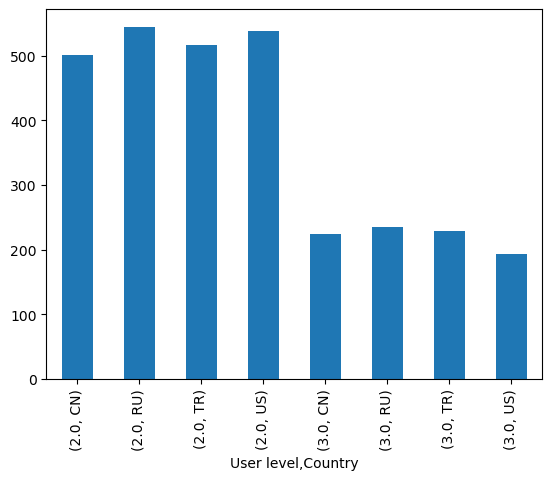

In [238]:
cn_levels.plot(kind='bar',stacked=True)

Из таблицы и графика, мы видим, что самое сильное снижение перехода со 2го на 3ий уровень прослеживается в США. При этом, как мы выяснили в ходе анализа данных, пользователи из этой страны готовы платить в большем количестве, чем пользователи из остальных анализируемых стран.